# Import library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create functions to prepare results

In [18]:
eval_metrics_dir = '../result/eval_metrics/'

col_names = {
    'loan_approval_prediction': ['Refused', 'Approved'],
    'review_priority_prediction': ['Low-Priority', 'High-Priority']
}

def read_result_from_csv(task_name, suffix):
    df = pd.read_csv(os.path.join(eval_metrics_dir, '{}_{}.csv'.format(task_name, suffix)))

    if 'each_class' in suffix:
        df['class'] = df['class'].str.replace('0.0','0')
        df['class'] = df['class'].str.replace('1.0','1')

        df['class'] = df['class'].str.replace('0', col_names[task_name][0])
        df['class'] = df['class'].str.replace('1',col_names[task_name][1])

    return df

def prepare_df_for_plotting(task_name):
    metrics_each_class_from_models = read_result_from_csv(task_name, 'result_each_class')
    metrics_all_classes_from_models = read_result_from_csv(task_name, 'result_all_classes')
    metrics_each_class_from_baselines = read_result_from_csv(task_name, 'each_class_baseline')
    metrics_all_classes_from_baselines = read_result_from_csv(task_name, 'all_classes_baseline')

    
    metrics_each_class_df = pd.concat([metrics_each_class_from_models, metrics_each_class_from_baselines])

    metrics_all_classes_df = pd.concat([metrics_all_classes_from_models, metrics_all_classes_from_baselines])

    melt_metrics_each_class_df = pd.melt(metrics_each_class_df, value_vars=['precision','recall','f1-score'], id_vars=['model', 'data-imbalanced-handling', 'class'])

    melt_metrics_all_classes_df = pd.melt(metrics_all_classes_df, value_vars=['AUC', 'MCC'], id_vars=['model', 'data-imbalanced-handling'])

    return melt_metrics_each_class_df, melt_metrics_all_classes_df


# Results for review priority of loan application prediction

In [33]:
result_each_class, result_all_classes = prepare_df_for_plotting('review_priority_prediction')

result_each_class.columns = ['Model', 'Data Imbalanced Handling', 'Class', 'Metric', 'Value']
result_all_classes.columns = ['Model', 'Data Imbalanced Handling', 'Metric', 'Value']

In [34]:
result_each_class

,Model,Data Imbalanced Handling,Class,Metric,Value
0,AdaBoostClassifier_DecisionTreeClassifier,imb-data,Low-Priority,precision,0.58
1,AdaBoostClassifier_DecisionTreeClassifier,imb-data,High-Priority,precision,0.98
2,AdaBoostClassifier_DecisionTreeClassifier,imb-data,macro avg,precision,0.78
3,KNeighborsClassifier,imb-data,Low-Priority,precision,0.70
4,KNeighborsClassifier,imb-data,High-Priority,precision,0.99
...,...,...,...,...,...
463,label-dist,SMOTE,High-Priority,f1-score,0.97
464,label-dist,SMOTE,macro avg,f1-score,0.50
465,label-dist,Tomek,Low-Priority,f1-score,0.03
466,label-dist,Tomek,High-Priority,f1-score,0.97


In [35]:
result_each_class[result_each_class['Class']=='macro avg'].sort_values(by=['Metric','Value'], ascending=False).groupby('Metric').head(15)

,Model,Data Imbalanced Handling,Class,Metric,Value
242,HistGradientBoostingClassifier,class-weight,macro avg,recall,0.94
227,LogisticRegression,class-weight,macro avg,recall,0.93
230,BaggingClassifier_LogisticRegression,class-weight,macro avg,recall,0.93
239,XGBClassifier,class-weight,macro avg,recall,0.93
245,Ensemble Voting,class-weight,macro avg,recall,0.93
257,LogisticRegression,SMOTE,macro avg,recall,0.93
260,BaggingClassifier_LogisticRegression,SMOTE,macro avg,recall,0.93
224,AdaBoostClassifier_LogisticRegression,class-weight,macro avg,recall,0.92
251,KNeighborsClassifier,SMOTE,macro avg,recall,0.91
269,XGBClassifier,SMOTE,macro avg,recall,0.91


/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
<ipython-input-36-db3e718ca796>:16: UserWarning: The figure layout has changed to tight
  g.fig.tight_layout()


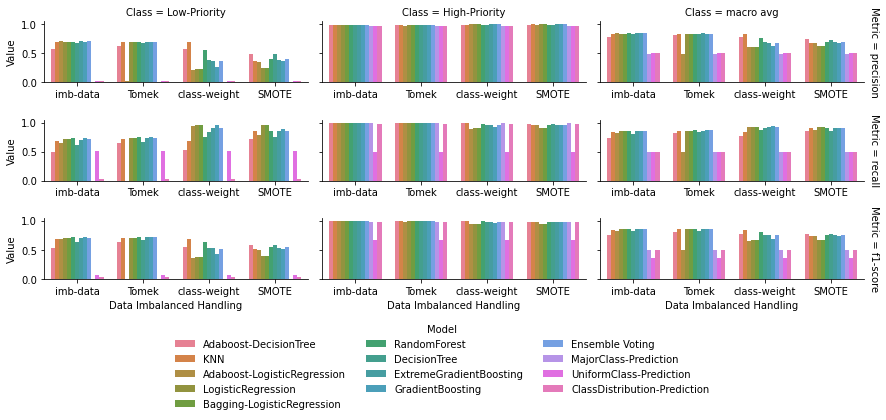

In [36]:
g = sns.catplot(
    data=result_each_class, x="Data Imbalanced Handling", y="Value", row='Metric', col="Class", hue = 'Model', kind="bar", height=1.5, margin_titles=True, sharex=False, aspect = 2
)

for t, l in zip(g.legend.texts, new_labels):
    t.set_text(l)


sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(0.5, -.3),
    ncol=3,
    title='Model', frameon=False,
)

g.fig.tight_layout()

# g.set_xticklabels(rotation=15)

In [37]:
result_all_classes

,Model,Data Imbalanced Handling,Metric,Value
0,AdaBoostClassifier_DecisionTreeClassifier,imb-data,AUC,0.968982
1,KNeighborsClassifier,imb-data,AUC,0.938745
2,AdaBoostClassifier_LogisticRegression,imb-data,AUC,0.977384
3,LogisticRegression,imb-data,AUC,0.978226
4,BaggingClassifier_LogisticRegression,imb-data,AUC,0.978215
...,...,...,...,...
99,uniform-label,Tomek,MCC,0.002433
100,label-dist,imb-data,MCC,0.001319
101,label-dist,class-weight,MCC,0.001319
102,label-dist,SMOTE,MCC,0.001319


In [38]:
result_all_classes.sort_values(by=['Metric','Value'], ascending=False).groupby('Metric').head(20)

,Model,Data Imbalanced Handling,Metric,Value
70,HistGradientBoostingClassifier,Tomek,MCC,0.712272
67,RandomForestClassifier,Tomek,MCC,0.711949
71,Ensemble Voting,Tomek,MCC,0.710027
69,XGBClassifier,Tomek,MCC,0.707543
60,HistGradientBoostingClassifier,imb-data,MCC,0.707324
57,RandomForestClassifier,imb-data,MCC,0.706730
61,Ensemble Voting,imb-data,MCC,0.703565
65,LogisticRegression,Tomek,MCC,0.702787
66,BaggingClassifier_LogisticRegression,Tomek,MCC,0.702787
59,XGBClassifier,imb-data,MCC,0.699016


/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
<ipython-input-39-b6c6904902f9>:14: UserWarning: The figure layout has changed to tight
  g.fig.tight_layout()


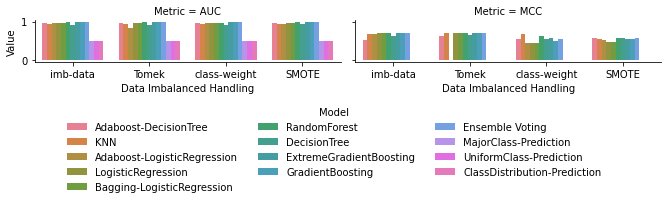

In [39]:
g = sns.catplot(
    data=result_all_classes, x="Data Imbalanced Handling", y="Value", col='Metric', hue = 'Model', kind="bar", height=1.5, margin_titles=True, sharex=False, col_wrap=2, aspect=2
)
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(0.5, -.9),
    ncol=3,
    title='Model', frameon=False,
)

for t, l in zip(g.legend.texts, new_labels):
    t.set_text(l)

g.fig.tight_layout()

# Results for loan application status prediction

In [19]:
result_each_class, result_all_classes = prepare_df_for_plotting('loan_approval_prediction')

result_each_class.columns = ['Model', 'Data Imbalanced Handling', 'Class', 'Metric', 'Value']
result_all_classes.columns = ['Model', 'Data Imbalanced Handling', 'Metric', 'Value']

In [20]:
result_each_class

,Model,Data Imbalanced Handling,Class,Metric,Value
0,AdaBoostClassifier_DecisionTreeClassifier,imb-data,Refused,precision,0.68
1,AdaBoostClassifier_DecisionTreeClassifier,imb-data,Approved,precision,0.90
2,AdaBoostClassifier_DecisionTreeClassifier,imb-data,macro avg,precision,0.79
3,KNeighborsClassifier,imb-data,Refused,precision,0.68
4,KNeighborsClassifier,imb-data,Approved,precision,0.91
...,...,...,...,...,...
463,label-dist,SMOTE,Approved,f1-score,0.83
464,label-dist,SMOTE,macro avg,f1-score,0.50
465,label-dist,Tomek,Refused,f1-score,0.18
466,label-dist,Tomek,Approved,f1-score,0.83


In [21]:
result_each_class[result_each_class['Class']=='macro avg'].sort_values(by=['Metric','Value'], ascending=False).groupby('Metric').head(15)

,Model,Data Imbalanced Handling,Class,Metric,Value
239,XGBClassifier,class-weight,macro avg,recall,0.82
242,HistGradientBoostingClassifier,class-weight,macro avg,recall,0.82
227,LogisticRegression,class-weight,macro avg,recall,0.81
230,BaggingClassifier_LogisticRegression,class-weight,macro avg,recall,0.81
245,Ensemble Voting,class-weight,macro avg,recall,0.81
257,LogisticRegression,SMOTE,macro avg,recall,0.81
260,BaggingClassifier_LogisticRegression,SMOTE,macro avg,recall,0.81
254,AdaBoostClassifier_LogisticRegression,SMOTE,macro avg,recall,0.80
263,RandomForestClassifier,SMOTE,macro avg,recall,0.80
272,HistGradientBoostingClassifier,SMOTE,macro avg,recall,0.80


In [26]:
new_labels = [
    'Adaboost-DecisionTree',
    'KNN',
    'Adaboost-LogisticRegression',
    'LogisticRegression',
    'Bagging-LogisticRegression',
    'RandomForest',
    'DecisionTree',
    'ExtremeGradientBoosting',
    'GradientBoosting',
    'Ensemble Voting',
    'MajorClass-Prediction',
    'UniformClass-Prediction',
    'ClassDistribution-Prediction'
]

/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
<ipython-input-29-5aafc37fc9f7>:16: UserWarning: The figure layout has changed to tight
  g.fig.tight_layout()


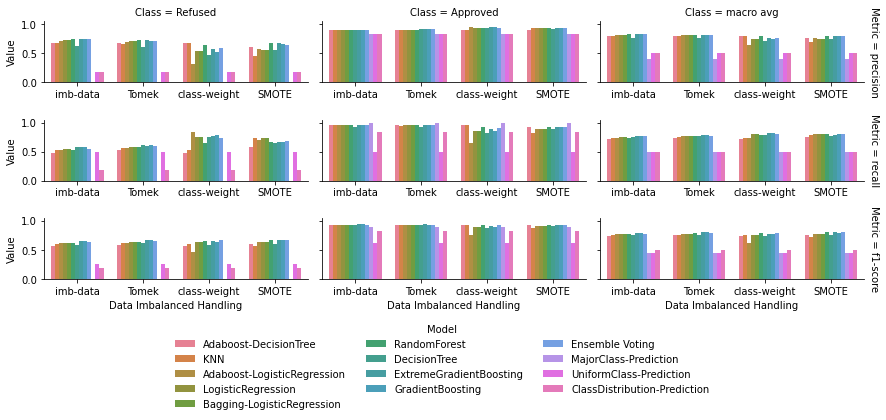

In [29]:
g = sns.catplot(
    data=result_each_class, x="Data Imbalanced Handling", y="Value", row='Metric', col="Class", hue = 'Model', kind="bar", height=1.5, margin_titles=True, sharex=False, aspect = 2
)


for t, l in zip(g.legend.texts, new_labels):
    t.set_text(l)

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(0.5, -.3),
    ncol=3,
    title='Model', frameon=False,
)

g.fig.tight_layout()

In [30]:
result_all_classes

,Model,Data Imbalanced Handling,Metric,Value
0,AdaBoostClassifier_DecisionTreeClassifier,imb-data,AUC,0.880380
1,KNeighborsClassifier,imb-data,AUC,0.852963
2,AdaBoostClassifier_LogisticRegression,imb-data,AUC,0.896936
3,LogisticRegression,imb-data,AUC,0.898738
4,BaggingClassifier_LogisticRegression,imb-data,AUC,0.898742
...,...,...,...,...
99,uniform-label,Tomek,MCC,0.001157
100,label-dist,imb-data,MCC,0.002537
101,label-dist,class-weight,MCC,0.002537
102,label-dist,SMOTE,MCC,0.002537


In [31]:
result_all_classes.sort_values(by=['Metric','Value'], ascending=False).groupby('Metric').head(15)

,Model,Data Imbalanced Handling,Metric,Value
69,XGBClassifier,Tomek,MCC,0.600436
70,HistGradientBoostingClassifier,Tomek,MCC,0.596482
87,RandomForestClassifier,SMOTE,MCC,0.595559
59,XGBClassifier,imb-data,MCC,0.594572
89,XGBClassifier,SMOTE,MCC,0.591487
60,HistGradientBoostingClassifier,imb-data,MCC,0.591074
91,Ensemble Voting,SMOTE,MCC,0.590657
90,HistGradientBoostingClassifier,SMOTE,MCC,0.589335
71,Ensemble Voting,Tomek,MCC,0.586186
81,Ensemble Voting,class-weight,MCC,0.582948


/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
<ipython-input-32-9d092d390a46>:15: UserWarning: The figure layout has changed to tight
  g.fig.tight_layout()


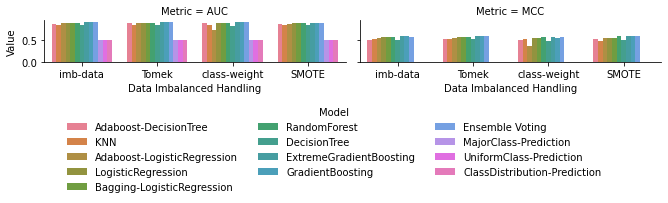

In [32]:
g = sns.catplot(
    data=result_all_classes, x="Data Imbalanced Handling", y="Value", col='Metric', hue = 'Model', kind="bar", height=1.5, margin_titles=True, sharex=False, col_wrap=2, aspect = 2
)

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(0.5, -.9),
    ncol=3,
    title='Model', frameon=False,
)

for t, l in zip(g.legend.texts, new_labels):
    t.set_text(l)

g.fig.tight_layout()